| Member      | Net ID |
|-------------|--------|
| Gabe Morris | gnm54  |
| Colin Young | ccy33  |
| Wyatt Davis | wd298  |
| Alaa Chriat | aec652 |

In [1]:
# Notebook Preamble
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

# Parameters

\begin{center}
\includegraphics{images/fig1} \\
Figure 1: Baja Model
\end{center}

| Property | Value                         |
|----------|-------------------------------|
| $W_1$    | 312 $lbf$                     |
| $W_2$    | 208 $lbf$                     |
| $k_{e1}$ | 92.4 $\frac{lbf}{in^2}$       |
| $k_{e2}$ | 195.7 $\frac{lbf}{in^2}$      |
| $L_1$    | 30.994 $in$                   |
| $L_2$    | 33.490 $in$                   |
| $I_G$    | 295.48 $lbf\cdot in\cdot s^2$ |

The values $W_1$ and $W_2$ were estimated to be $312\,lbf$ and $208\,lbf$ respectfully. This information was used to calculate the equivalent stiffness in the front and rear suspensions,

$$k_{e1}=\frac{W_1}{\Delta x}$$
$$k_{e2}=\frac{W_2}{\Delta x}$$

where $\Delta x$ was found to be 3.375 inches in the rear and 1.0625 inches in the front.

## Calculating $I_G$
The pitch natural frequency $\omega_{n2}$ (refers to the motion caused by a changing $\theta$) was calculated by obtaining data from an accelerometer below. This data was obtained by producing a rocking motion with the accelerometer at the end of the vehicle. Similarly, the bounce natural frequency $\omega_{n1}$ (refers to motion caused by vertical bouncing - changing $x$) was obtained from the accelerometer data below. The accelerometer was placed close to the center of gravity and vertical, bouncing motion was produced on the vehicle.

\begin{center}
\includegraphics{images/pitch} \\
Figure 2: Sample Data of Pitch Natural Frequency
\end{center}

The figure above shows one trial for obtaining the pitch natural frequency. The middle spike is the moment the person jumps off the vehicle, allowing it to oscillate. The average period (peak to peak) was 0.1945 seconds, and the frequency is $\frac{1}{0.1945\,s}=5.141\,\frac{cycles}{s}$. The natural frequency may be calculated,

$$\omega_{n2}=2\pi f=2\pi(5.141)=32.299\,\frac{rad}{s}$$

The mass moment of inertia may be calculated by obtaining the moment equation,

$$I_G\ddot{\theta}=-k_{e1}(y_1-x+L_1\theta)L_1+k_{e2}(y_2-x-L_2\theta)L_2$$

Since the data was obtained on a level surface and $x$ was very small, the equation simplifies to

$$I_G\ddot{\theta}=-k_{e1}L_1^2\theta-k_{e2}L_2^2\theta$$
$$I_Gs^2\theta=-k_{e1}L_1^2\theta-k_{e2}L_2^2\theta$$

Plugging in the pitch natural frequency in for $s$ and solving for $I_G$ (only interested in magnitude),

$$I_G=\frac{k_{e1}L_1^2+k_{e2}L_2^2}{\omega_{n2}^2}=295.48\,lbf\cdot in\cdot s^2$$

# Equations of Motion
Summing the moments and forces in the vertical direction,

$$\begin{cases}
m\ddot{x}=k_{e1}(y_1-x+L_1\theta)+k_{e2}(y_2-x-L_2\theta) \\
I_G\ddot{\theta}=-k_{e1}(y_1-x+L_1\theta)L_1+k_{e2}(y_2-x-L_2\theta)L_2
\end{cases}$$

In the laplace space,

$$\begin{cases}
ms^2X(s)=k_{e1}(Y_1(s)-X(s)+L_1\theta(s))+k_{e2}(Y_2(s)-X(s)-L_2\theta(s)) \\
I_Gs^2\theta(s)=-k_{e1}(Y_1(s)-X(s)+L_1\theta(s))L_1+k_{e2}(Y_2(s)-X(s)-L_2\theta(s))L_2
\end{cases}$$

## Natural Frequencies
The system may be placed in the matrix form with $y_1$ and $y_2$ being set equal to zero because the free response is the main interest in determining the natural frequencies.

In [2]:
# Input all measured quantities here
k1 = 92.4  # lbf/in
k2 = 195.7  # lbf/in
L1 = 30.994  # in
L2 = 33.49  # in
m = 520/(32.174*12)  # lbf*s^2/in (The total weight divided by acceleration of gravity)
IG = 295.48  # lbf*in*s^2

# Putting the system in the matrix form
# Defining symbols (underscore denotes symbolic variable)
L1_, L2_ = sp.symbols('L_1 L_2')
x_, k1_, k2_, IG_, s_, m_ = sp.symbols('x k_1 k_2 I_G s m')
X_, theta_ = sp.symbols(r'X \theta')

eq1 = sp.Eq(m_*s_**2*X_, k1_*(-X_ + L1_*theta_) + k2_*(-X_ - L2_*theta_))
eq1
eq2 = sp.Eq(IG_*s_**2*theta_, -k1_*(-X_ + L1_*theta_)*L1_ + k2_*(-X_ - L2_*theta_)*L2_)
eq2

M_ = sp.linear_eq_to_matrix([eq1, eq2], (X_, theta_))[0]
X_matrix = sp.Matrix([X_, theta_])
sp.Eq(sp.MatMul(M_, X_matrix), sp.Matrix([0, 0]))

Eq(X*m*s**2, k_1*(L_1*\theta - X) + k_2*(-L_2*\theta - X))

Eq(I_G*\theta*s**2, -L_1*k_1*(L_1*\theta - X) + L_2*k_2*(-L_2*\theta - X))

Eq(Matrix([
[k_1 + k_2 + m*s**2,                 -L_1*k_1 + L_2*k_2],
[-L_1*k_1 + L_2*k_2, I_G*s**2 + L_1**2*k_1 + L_2**2*k_2]])*Matrix([
[     X],
[\theta]]), Matrix([
[0],
[0]]))

The expanded matrix is,

In [3]:
# Expanding the matrix symbolically
poly_ = M_.det()
poly_.collect(s_)

# Getting a numerical polynomial
poly = poly_.subs([
    (L1_, L1),
    (IG_, IG),
    (m_, m),
    (L2_, L2),
    (k1_, k1),
    (k2_, k2)
])
poly

display(Latex('Roots/Natural Frequencies:'))
roots = sp.roots(poly)
roots_keys = list(roots.keys())
nat_freq = [abs(sp.im(roots_keys[0])), abs(sp.im(roots_keys[-1]))]
roots_numpy = np.float64(nat_freq)
for root in roots:
    display(root)

I_G*m*s**4 + L_1**2*k_1*k_2 + 2*L_1*L_2*k_1*k_2 + L_2**2*k_1*k_2 + s**2*(I_G*k_1 + I_G*k_2 + L_1**2*k_1*m + L_2**2*k_2*m)

397.965230724602*s**4 + 500299.285612275*s**2 + 75191151.4476461

<IPython.core.display.Latex object>

-13.2105849255893*I

13.2105849255893*I

-32.9032468135746*I

32.9032468135746*I

## Mode Ratio $\frac{X}{\theta}$
The mode ratio $\frac{X}{\theta}$ may be found using the bounce equation (first equation in the systems above),

In [4]:
# Finding the mode ratio
T_ = sp.Symbol('T')
w_ = sp.Symbol(r'\omega')

sol = sp.solve(eq1.subs(X_, T_*theta_), T_)[0]
sp.Eq(X_/theta_, sol)

sol_num = sol.subs([(L1_, L1), (L2_, L2), (k1_, k1), (k2_, k2), (m_, m)])
sp.Eq(X_/theta_, sol_num)

sol_omega = sol_num.subs(s_, w_*sp.I)
sp.Eq(X_/theta_, sol_omega)

Eq(X/\theta, (L_1*k_1 - L_2*k_2)/(k_1 + k_2 + m*s**2))

Eq(X/\theta, -3690.1474/(1.34684320673007*s**2 + 288.1))

Eq(X/\theta, -3690.1474/(288.1 - 1.34684320673007*\omega**2))

Now we can calculate the mode shape based on the system's natural frequencies and plot over a range of frequencies.

In [5]:
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr'
# Getting the mode shapes
# Units are inches
mode1 = sol_omega.subs(w_, nat_freq[0]).n()
mode1
mode2 = sol_omega.subs(w_, nat_freq[1]).n()
mode2

-69.5604241331829

3.15390660658887

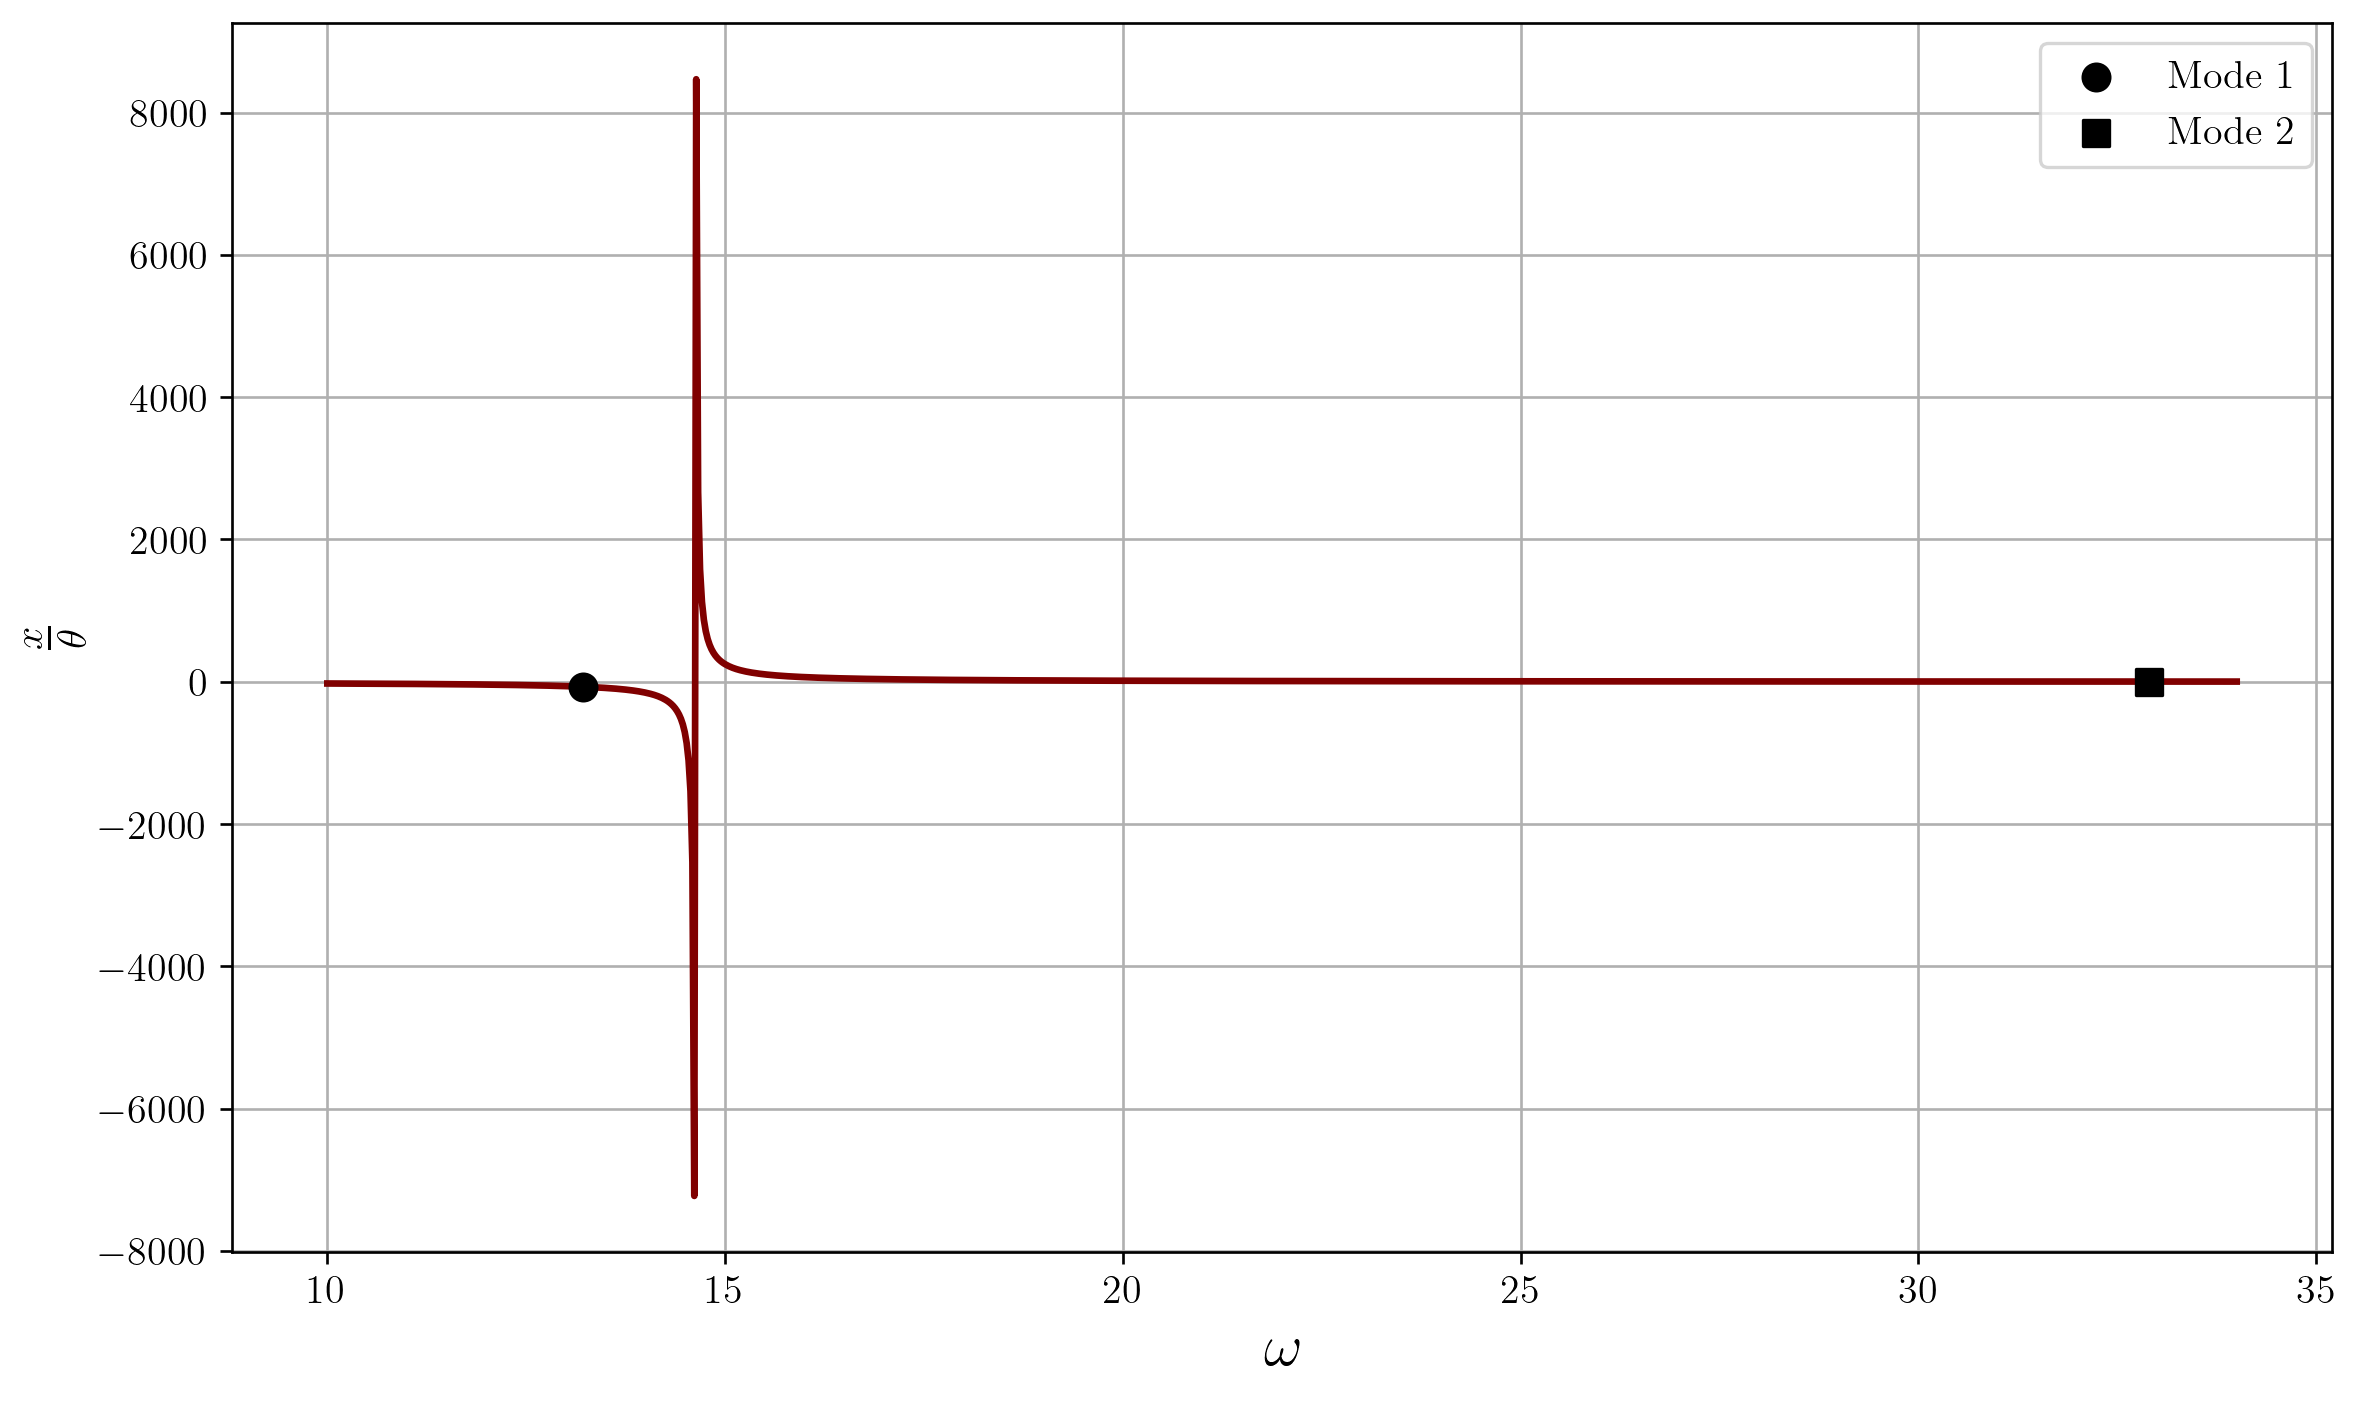

In [6]:
# Getting a plot
nat1, nat2 = roots_numpy
mode_lamb = sp.lambdify(w_, sol_omega, modules='numpy')
w = np.linspace(10, 34, 1000)

plt.plot(w, mode_lamb(w), zorder=2)
plt.scatter(nat1, np.float64(mode1), marker='o', label='Mode 1', zorder=3, color='black')
plt.scatter(nat2, np.float64(mode2), marker='s', label='Mode 2', zorder=3, color='black')
plt.legend()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{x}{\theta}$')
plt.show()

Mode 1 was found to be -69.6 inches, and the negative sign indicates that this node is located ahead of the mass center. The larger magnitude indicates that this mode is predominantly a bounce motion, since $x>\theta$. Mode 2 was found to be 3.15 inches, and the positive value indicates that the node is located behind the mass center. The smaller magnitude indicates that the motion is closer to a pitch motion (rocking). The first mode shape is closer to the spike of the graph, which means that its position is more sensitive to minor adjustments in the parameters.

The front suspension has a higher natural frequency than the rear suspension, which needs to be avoided. This is because the bounce center needs to be behind the rear axle (greater than 30.994) and pitch center needs to be near the front axle for better riding experience. This set of parameters does not accomplish this particular behavior.

Designing the system in this type of manner could be accomplished by trial and error. Also, for the case of the baja car, the suspension is positioned at an angle that shouldn't be ignored in the system of equations derived above. This should be accounted for, and the stiffness may be more accurately acquired by getting the stiffness of each spring individually, rather than approximating the weight distribution. The model may also be further refined by including the damping, which is clearly seen in Figure 2.